In [ ]:
%%capture
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c anaconda python=3.7
!time conda install -q -y -c conda-forge rdkit=2020.09.02
!pip3 install cairosvg

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

#needed for show_mols
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import cairosvg
import math
import os

from rdkit import rdBase
rdBase.rdkitVersion

'2020.09.1'

In [ ]:
#inspired by https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb
def show_mols(mols, mols_per_row = 5, size=200, min_font_size=12, legends=[], file_name=''):
  if legends and len(legends) < len(mols):
    print('legends is too short')
    return None

  mols_per_row = min(len(mols), mols_per_row)
  rows = math.ceil(len(mols)/mols_per_row)
  d2d = rdMolDraw2D.MolDraw2DSVG(mols_per_row*size,rows*size,size,size)
  d2d.drawOptions().minFontSize = min_font_size
  if legends:
    d2d.DrawMolecules(mols, legends=legends)
  else:
    d2d.DrawMolecules(mols)
  d2d.FinishDrawing()

  if file_name:
    with open('d2d.svg', 'w') as f:
      f.write(d2d.GetDrawingText())
      if 'pdf' in file_name:
        cairosvg.svg2pdf(url='d2d.svg', write_to=file_name)
      else:
        cairosvg.svg2png(url='d2d.svg', write_to=file_name)
      os.remove('d2d.svg')

  return SVG(d2d.GetDrawingText())

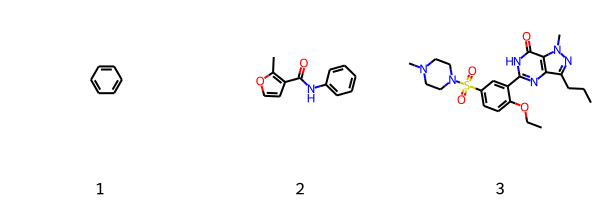

In [ ]:
smiles_list = ['c1ccccc1','Cc1occc1C(=O)Nc2ccccc2', 'CN1CCN(S(=O)(C2=CC=C(OCC)C(C3=NC4=C(N(C)N=C4CCC)C(N3)=O)=C2)=O)CC1']
mols = [Chem.MolFromSmiles(x) for x in smiles_list]
legends = ['1', '2', '3']

show_mols(mols, legends=legends, file_name='test.png')